In [849]:
import numpy as np

In [850]:
ndata = 100
mA = [1.0, 0.3]
sigmaA = 0.2
mB = [0.0, -0.1]
sigmaB = 0.3

# Generate data for classA
ndata_half = round(0.5 * ndata)
classA = np.zeros((2, ndata))
classA[0, :ndata_half] = np.random.randn(1, ndata_half) * sigmaA - mA[0]
classA[0, ndata_half:] = np.random.randn(1, ndata_half) * sigmaA + mA[0]
classA[1, :] = np.random.randn(1, ndata) * sigmaA + mA[1]

# Generate data for classB
classB = np.zeros((2, ndata))
classB[0, :] = np.random.randn(1, ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(1, ndata) * sigmaB + mB[1]

In [851]:
classA[:,:5], classB[:,:5]

(array([[-0.66989913, -0.82058951, -0.78720563, -1.02136685, -0.9380175 ],
        [ 0.59649017,  0.41502136,  0.34229896,  0.23891216,  0.28759736]]),
 array([[-0.23996583,  0.09096343, -0.4002792 ,  0.12335524,  0.3320362 ],
        [-0.33881532, -0.07087556, -0.38524604, -0.2861453 , -0.03879995]]))

In [852]:
classA.shape, classB.shape

((2, 100), (2, 100))

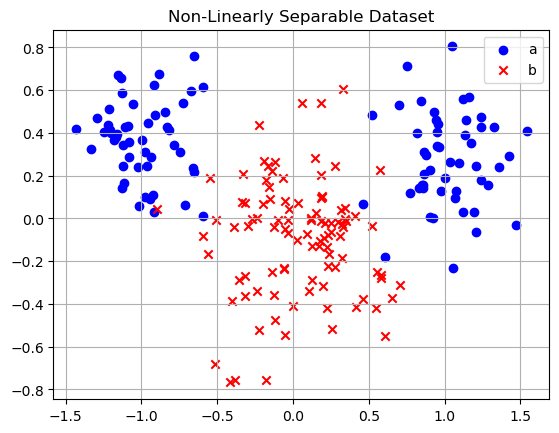

In [853]:
import matplotlib.pyplot as plt
plt.title("Non-Linearly Separable Dataset")
plt.scatter(classA[0,:], classA[1,:], c='b', label='a', marker='o')
plt.scatter(classB[0,:], classB[1,:], c='r', label='b', marker='x')
plt.legend()
plt.grid(True)
plt.show()

In [854]:
classA = np.vstack((classA, (-1) * np.ones(ndata)))
classB = np.vstack((classB, np.ones(ndata)))
classA.shape, classB.shape

((3, 100), (3, 100))

In [855]:
rng = np.random.default_rng()

rng.shuffle(classA, axis=1)
rng.shuffle(classB, axis=1)

In [856]:
dataset = np.vstack((np.ones(2*ndata), np.hstack((classA, classB))))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.32426805, -1.13100137,  0.90331503,  0.9482884 ,  0.97411211],
        [ 0.42802921,  0.14374072,  0.00730413,  0.34056677,  0.12748506],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [857]:
# shuffling the dataset horizontally...
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.99744297,  0.03212862, -0.33840713,  0.55284949,  0.19750769],
       [ 0.36645369,  0.07013367,  0.07650923, -0.25045694, -0.3145213 ],
       [-1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [858]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

In [859]:
class PerceptronDeltaRuleClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        return np.array((self.W @ X) > 0, dtype=int) * 2 - 1

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for _ in range(0, n_epochs):
                predictions = self.W @ X # without step function
                e = y - predictions 
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                predErrors = y - ( np.array((self.W @ X) > 0, dtype=int) * 2 - 1 )
                nErrors = np.sum( np.array(predErrors != 0, dtype=int))
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
        else:
            for _ in range(0, n_epochs):
                idx = 0
                while (idx < X.shape[1]):
                    next_idx = idx + batch_size
                    print(X[:, idx:next_idx].shape)
                    predictions = self.W @ X[:, idx:next_idx] # without step function
                    print(predictions.shape)
                    e = y[idx:next_idx] - predictions
                    print(e.shape)
                    dW = self.learning_rate * (e @ X[:, idx:next_idx])
                    self.W += dW

                    self.epochs += 1
                    idx = next_idx
                    print("done")
        
    def fit_one_epoch(self, X, y):
        for i in range(0, X.shape[1]): # for each sample
        # for i in range(0, 3):
            prediction = self.W @ X[:,i]    # compute the prediction 
            #print(prediction)
            e = y[i] - prediction         # calculate the error
            print(e)
            dW = self.learning_rate * (e * X[:,i])  
            #print(dW)
            self.W = self.W + dW
            #print(self.W)
            if (i%10 == 0):
                print("Weights after {} points: {}".format(i, self.W))

        # after the epoch see how many are wrongly classified
        pred_labels = self.predict(X)
        pred_errors = y - pred_labels
        nErrors = np.sum(np.array(pred_errors != 0, dtype=int))
        print("Errors after this epoch:" + str(nErrors))

In [860]:
perceptron_classifier = PerceptronDeltaRuleClassifier(0.01)

In [861]:
classA.shape

(3, 100)

In [862]:
classA[0,:5]

array([ 1.32426805, -1.13100137,  0.90331503,  0.9482884 ,  0.97411211])

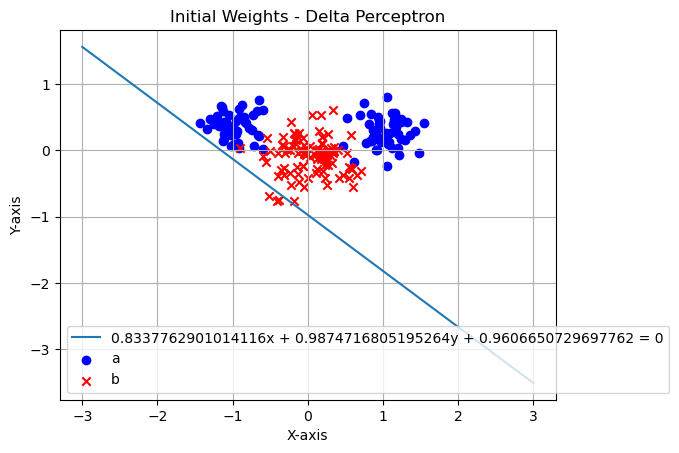

[0.96066507 0.83377629 0.98747168]


In [863]:
x = np.linspace(-3, 3, 10)
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA[0,:], classA[1,:], c='b', label='a', marker='o')
plt.scatter(classB[0,:], classB[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [864]:
for _ in range(200):
    perceptron_classifier.fit_one_epoch(X_train, y_train)
perceptron_classifier.W

-1.4908834195382534
Weights after 0 points: [0.94575624 0.848647   0.98200828]
-0.041893934303675495
0.2667158946305209
-0.17067755278761876
0.19550721067833388
0.5851608435325479
0.33564099506626544
-1.5849434190848282
-0.23375972996087002
-2.719643892499313
0.3240910121378008
Weights after 10 points: [0.91531821 0.83981237 0.96734401]
-2.856711524685929
0.18039574589330487
-0.13087282627595465
0.6741294476199181
0.00015384846324473234
-2.994144979315119
-0.20130979227546875
-2.920046366438867
-2.821679228308367
-0.1498281360584548
Weights after 20 points: [0.80311907 0.72371181 0.93410897]
0.5310862811463839
-2.701257705386321
-2.5126222391400135
0.7615998588859034
0.04999716264041831
-1.8678693777697482
1.2362052350291852
0.4971695258316837
-1.7060332828427796
0.6198946554073668
Weights after 30 points: [0.75220078 0.69147347 0.88936681]
-2.708325201513839
0.18753538799627734
-3.1379274132329815
-1.7075457346447305
-2.813263976706163
-1.3180653424718924
-1.193743197681329
-1.2674193

array([ 0.14097379, -0.0723793 , -2.09890771])

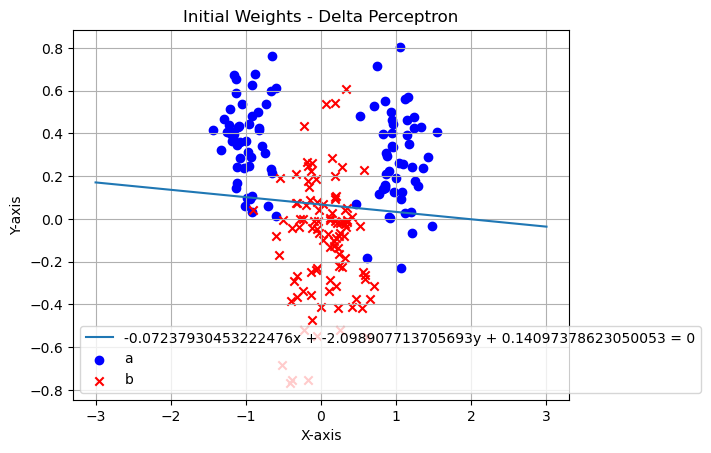

[ 0.14097379 -0.0723793  -2.09890771]


In [865]:
x = np.linspace(-3, 3, 10)
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA[0,:], classA[1,:], c='b', label='a', marker='o')
plt.scatter(classB[0,:], classB[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

-----------------

### 1) Taking out random 25% from each class

In [866]:
t = int(ndata - (ndata * 0.25))
classA_new = classA[:,:t]
classA_holdout = classA[:,t:]
classA_new.shape, classA_holdout.shape

((3, 75), (3, 25))

In [867]:
classB_new = classB[:,:t]
classB_holdout = classB[:,t:]
classB_new.shape, classB_holdout.shape

((3, 75), (3, 25))

In [868]:
dataset = np.hstack((classA_new, classB_new))
dataset[:,:3], dataset.shape

(array([[ 1.32426805, -1.13100137,  0.90331503],
        [ 0.42802921,  0.14374072,  0.00730413],
        [-1.        , -1.        , -1.        ]]),
 (3, 150))

In [869]:
dataset = np.vstack((np.ones(2*t), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.32426805, -1.13100137,  0.90331503,  0.9482884 ,  0.97411211],
        [ 0.42802921,  0.14374072,  0.00730413,  0.34056677,  0.12748506],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [870]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.17620134,  0.18314031,  0.1080635 , -1.43194332,  0.86597674],
       [-0.10439779, -0.01112019, -0.33753689,  0.41661137,  0.30953627],
       [ 1.        ,  1.        ,  1.        , -1.        , -1.        ]])

In [871]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [872]:
X_train[:,:5], y_train[:5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.17620134,  0.18314031,  0.1080635 , -1.43194332,  0.86597674],
        [-0.10439779, -0.01112019, -0.33753689,  0.41661137,  0.30953627]]),
 array([ 1.,  1.,  1., -1., -1.]))

In [873]:
perceptron_classifier = PerceptronDeltaRuleClassifier(0.01)

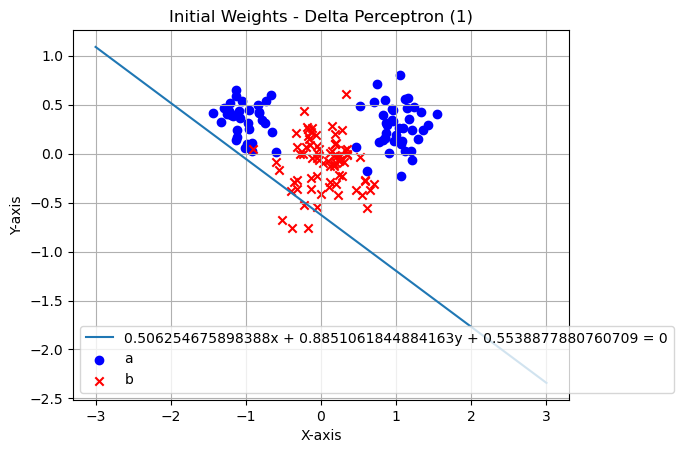

[0.55388779 0.50625468 0.88510618]


In [874]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [875]:
for _ in range(200):
    perceptron_classifier.fit_one_epoch(X_train, y_train)
perceptron_classifier.W

0.44931259146973135
Weights after 0 points: [0.55838091 0.50704637 0.88463711]
0.35859578706260686
0.6817531564789115
-1.2083019540145734
-2.283526207874797
-2.3565719896719997
-2.4429282590694568
0.43903540763575044
-1.391790610839886
-1.6035702625321053
-1.1344964337166634
Weights after 10 points: [0.4489629  0.46586499 0.84933418]
-1.7462643364712764
0.7903674062367311
-1.9557105502637766
-2.011985765946031
-1.4199017481676377
0.5626642716425183
0.8647264490511439
0.9591135683520801
0.42527415187180784
-2.151243866635615
Weights after 20 points: [0.3921333  0.40764003 0.8211735 ]
-1.2494190084872714
-1.1965943214787709
0.6988804545131573
0.6888387118849479
-2.071072172973602
1.0071090650813084
1.102511772998613
0.4963095521878973
-2.1295857663139555
0.6104111647795476
Weights after 30 points: [0.37170719 0.37692543 0.79373927]
0.9540017157429823
-1.3728055579752465
-1.4289652517014817
0.6652370828984506
0.5785257181208521
-2.223462868820847
-2.0654324433843567
1.377517488106603
-2.1

array([ 0.22432531, -0.06773442, -2.09710301])

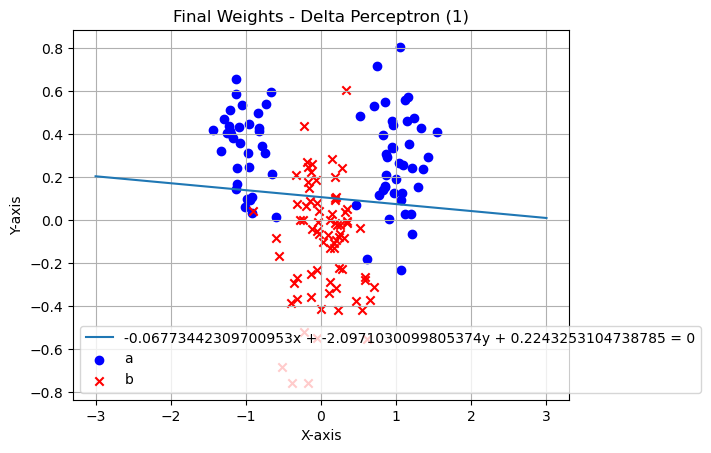

[ 0.22432531 -0.06773442 -2.09710301]


In [876]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [877]:
holdout = np.hstack((classA_holdout, classB_holdout))
holdout[:,:5]

array([[ 1.47374708, -0.91314124, -1.10999374,  1.13758427,  1.23743971],
       [-0.03175008,  0.48228933,  0.428547  ,  0.39077255,  0.42601921],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [878]:
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]
X_holdout[:,:5], y_holdout[:5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.47374708, -0.91314124, -1.10999374,  1.13758427,  1.23743971],
        [-0.03175008,  0.48228933,  0.428547  ,  0.39077255,  0.42601921]]),
 array([-1., -1., -1., -1., -1.]))

In [879]:
predictions = perceptron_classifier.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([ 1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1]),
 array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0., -2.,  0.,
         0.,  0.,  0., -2., -2.,  0.,  0.,  0.,  0.,  0.,  0.]))

In [880]:
accuracy_1 = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_1

0.86

In [881]:
accuracy_classA_1 = 1 - np.sum(np.array(diff == 2, dtype=int)) / len(diff) # label is -1 and prediction is 1, so diff=2
accuracy_classB_1 = 1 - np.sum(np.array(diff == -2, dtype=int)) / len(diff) # label is 1 and prediction is -1, so diff=-2
accuracy_classA_1, accuracy_classB_1

(0.94, 0.92)

---------

### 1) Taking out random 50% from class A

In [882]:
t = int(ndata - (ndata * 0.5))
classA_new = classA[:,:t]
classA_holdout = classA[:,t:]
classA_new.shape, classA_holdout.shape

((3, 50), (3, 50))

In [883]:
classB_new = classB
classB_holdout = np.array([])

In [884]:
dataset = np.hstack((classA_new, classB_new))
dataset[:,:3], dataset.shape

(array([[ 1.32426805, -1.13100137,  0.90331503],
        [ 0.42802921,  0.14374072,  0.00730413],
        [-1.        , -1.        , -1.        ]]),
 (3, 150))

In [885]:
dataset = np.vstack((np.ones(150), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.32426805, -1.13100137,  0.90331503,  0.9482884 ,  0.97411211],
        [ 0.42802921,  0.14374072,  0.00730413,  0.34056677,  0.12748506],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [886]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.23264207, -0.12039837, -0.54593966,  0.25239378,  0.27488376],
       [-0.0789714 ,  0.26243204,  0.19074797, -0.02096829, -0.22680992],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [887]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [888]:
perceptron_classifier = PerceptronDeltaRuleClassifier(0.01)

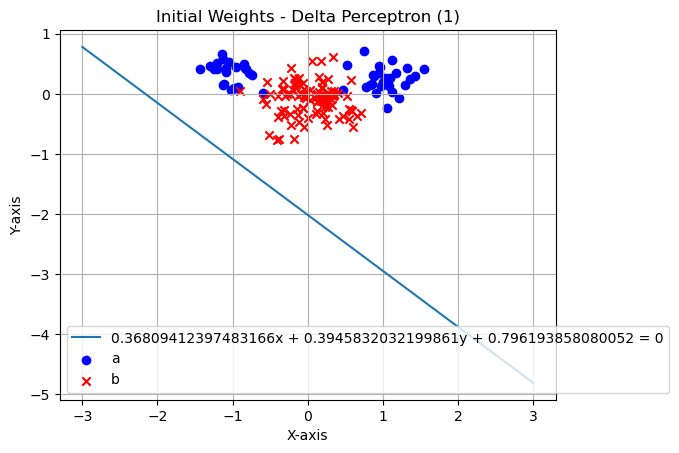

[0.79619386 0.36809412 0.3945832 ]


In [889]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [890]:
for _ in range(200):
    perceptron_classifier.fit_one_epoch(X_train, y_train)
perceptron_classifier.W

0.14933275155826164
Weights after 0 points: [0.79768719 0.36844153 0.39446527]
0.1431522501446194
0.3266189341734482
0.11340850863518148
0.18535103293130184
0.18750432412687312
0.44354229051203553
0.1437656511914177
0.19805307707363373
-2.1116374200258887
0.23625609063963826
Weights after 10 points: [0.79634733 0.34358919 0.39828961]
-1.64548137955967
-2.148697875179115
0.2504933427307512
0.19792106237228513
-1.6050183961428095
-2.1172155036834686
-1.3843325398655368
-2.4232150942022495
-1.8635969416022018
-2.1609920023383604
Weights after 20 points: [0.64734598 0.3018958  0.33901462]
0.3848639851559553
-2.0525731536319727
0.28539382388143064
-1.9796754374564047
0.5748372838935156
0.26603945276038654
0.333521099774865
0.3134297530385691
-1.4759058617106926
-2.0045600554394807
Weights after 30 points: [0.59379969 0.25981247 0.31355287]
0.2585351830103527
0.7522324952454446
0.591811686145497
0.3156139598213056
0.716593057166587
0.347354921178212
-1.9147339661705152
-1.5265995275338342
-1

array([ 0.38447127, -0.09826334, -1.82042136])

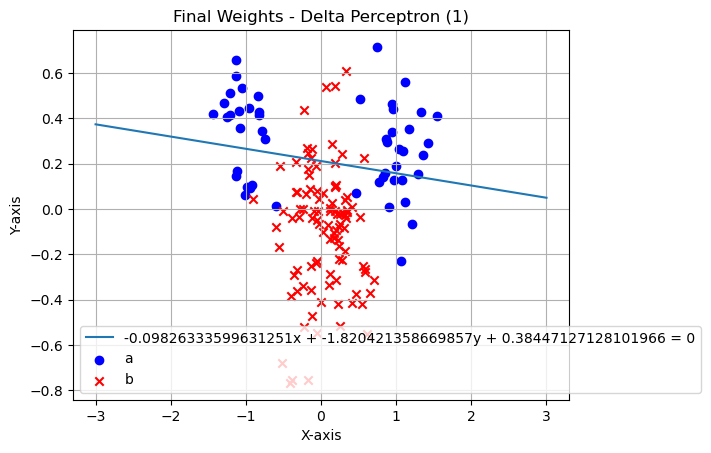

[ 0.38447127 -0.09826334 -1.82042136]


In [891]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [892]:
holdout = classA_holdout
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]

In [893]:
predictions = perceptron_classifier.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([-1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
         1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
        -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([0., 0., 2., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0., 2., 0., 2., 0.,
        2., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0., 2., 2., 0.,
        0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0.]))

In [894]:
y_holdout

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [895]:
accuracy_2 = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_2

0.72

--------------

# 3) taking out 50% of class B

In [896]:
classA_new = classA
classA_holdout = np.array([])

In [897]:
t = int(ndata - (ndata * 0.5))
classB_new = classB[:,:t]
classB_holdout = classB[:,t:]
classB_new.shape, classB_holdout.shape

((3, 50), (3, 50))

In [898]:
dataset = np.hstack((classA_new, classB_new))
dataset[:,:3], dataset.shape

(array([[ 1.32426805, -1.13100137,  0.90331503],
        [ 0.42802921,  0.14374072,  0.00730413],
        [-1.        , -1.        , -1.        ]]),
 (3, 150))

In [899]:
dataset = np.vstack((np.ones(150), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.32426805, -1.13100137,  0.90331503,  0.9482884 ,  0.97411211],
        [ 0.42802921,  0.14374072,  0.00730413,  0.34056677,  0.12748506],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [900]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.92228552,  1.42515438, -0.35561643, -0.15332644,  0.75066292],
       [ 0.00234885,  0.29160765, -0.28955841,  0.08980478,  0.71444325],
       [-1.        , -1.        ,  1.        ,  1.        , -1.        ]])

In [901]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [902]:
perceptron_classifier = PerceptronDeltaRuleClassifier(0.01)

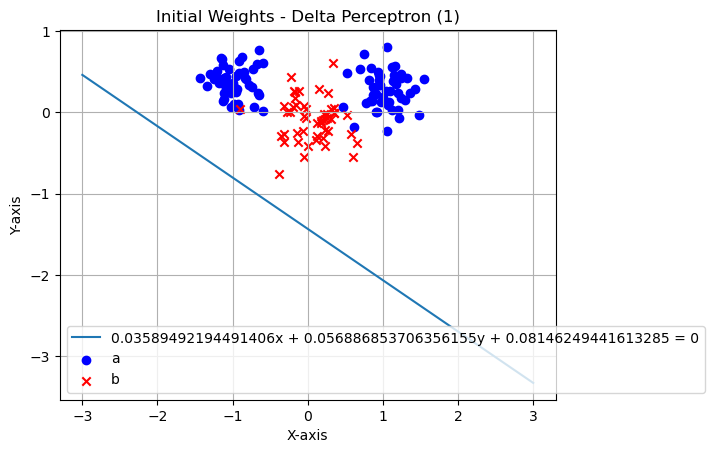

[0.08146249 0.03589492 0.05688685]


In [903]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [904]:
for _ in range(200):
    perceptron_classifier.fit_one_epoch(X_train, y_train)
perceptron_classifier.W

-1.114701480147714
Weights after 0 points: [0.07031548 0.02561419 0.05686067]
-1.1234006634898273
0.9598497808208343
0.9277066444390413
-1.118429156098704
0.9483933049163688
-1.0954909208310406
-1.0713725028446357
0.9418044106671621
0.9387600097098571
-1.0958986103075534
Weights after 10 points: [0.0624347  0.01274519 0.02988304]
-1.0802691021500843
0.9646990815111642
-1.0695440165557613
-1.0505379702189908
-1.0350806696896113
0.9524941498178837
-1.0732175755409485
-1.01856585433215
-1.05817596566128
-1.0326545828360454
Weights after 20 points: [-0.00257382  0.006917    0.00377007]
-0.990630865709103
-1.0053828689118147
-0.9627725093126045
1.0530417748976122
-0.9647619623987996
-0.9816385067763346
1.0274972393198145
-0.980855323548067
1.036707209913012
1.0262036795286935
Weights after 30 points: [-0.01999974  0.01509334 -0.02353544]
-0.9948924785548217
-0.9661797435413331
-0.9601982681180485
1.0569089074018392
-0.9562312422454089
-0.9403969030473913
-0.9149689539789425
-0.9088973602452

array([ 0.06605247, -0.09212941, -2.12050746])

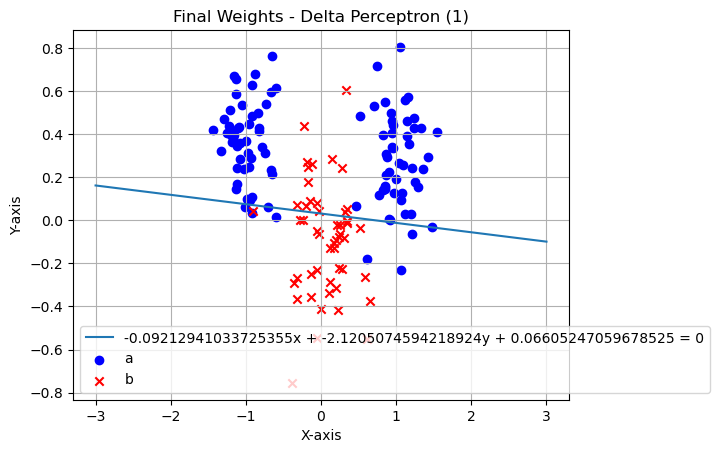

[ 0.06605247 -0.09212941 -2.12050746]


In [905]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [906]:
holdout = classB_holdout
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]

In [907]:
predictions = perceptron_classifier.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([ 1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
        -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1]),
 array([ 0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,
        -2., -2.,  0.,  0., -2.,  0., -2.,  0., -2., -2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2., -2., -2.,  0.,
         0., -2.,  0., -2., -2.,  0.,  0.,  0.,  0.,  0.,  0.]))

In [908]:
accuracy_3 = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_3

0.7

---------------

# 4) taking out 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

In [909]:
classA[:,:3]

array([[ 1.32426805, -1.13100137,  0.90331503],
       [ 0.42802921,  0.14374072,  0.00730413],
       [-1.        , -1.        , -1.        ]])

In [910]:
a_less_zero = classA[:, classA[0, :] < 0]
a_more_zero = classA[:, classA[0, :] >= 0]
a_less_zero.shape, a_more_zero.shape

((3, 50), (3, 50))

In [911]:
classB_new = classB

In [912]:
classA_new = np.hstack((a_less_zero[:, :40], a_more_zero[:, :10]))
classA_holdout = np.hstack((a_less_zero[:, 40:], a_more_zero[:, 10:]))
classA_new.shape, classA_holdout.shape

((3, 50), (3, 50))

In [913]:
dataset = np.hstack((classA_new, classB_new))
dataset[:,:3], dataset.shape

(array([[-1.13100137, -0.97993092, -0.7451089 ],
        [ 0.14374072,  0.09867273,  0.31012374],
        [-1.        , -1.        , -1.        ]]),
 (3, 150))

In [914]:
dataset = np.vstack((np.ones(150), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-1.13100137, -0.97993092, -0.7451089 , -1.24666229, -1.08336338],
        [ 0.14374072,  0.09867273,  0.31012374,  0.40513553,  0.35909521],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [915]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.09096343,  0.31360232,  0.19256156, -0.97685142, -0.23996583],
       [-0.07087556,  0.03986543,  0.10099435,  0.31155033, -0.33881532],
       [ 1.        ,  1.        ,  1.        , -1.        ,  1.        ]])

In [916]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [917]:
perceptron_classifier = PerceptronDeltaRuleClassifier(0.01)

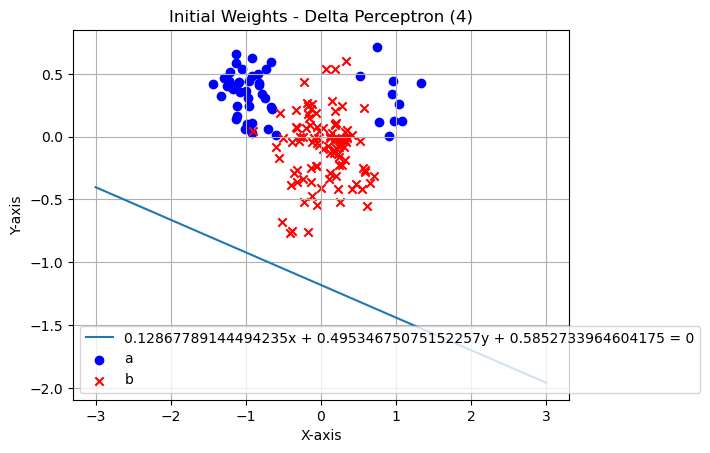

[0.5852734  0.12867789 0.49534675]


In [918]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (4)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [919]:
for _ in range(200):
    perceptron_classifier.fit_one_epoch(X_train, y_train)
perceptron_classifier.W

0.4381295991505101
Weights after 0 points: [0.58965469 0.12907643 0.49503622]
0.35013180719234416
0.33176743714341816
-1.6230650931752306
0.6211257328597406
-1.7901309947191888
-1.6062277552438267
-1.5829111666423012
-1.536450240146734
0.5183158371893193
0.3815270404299387
Weights after 10 points: [0.53029552 0.1771837  0.46935446]
0.1265445815687547
0.5617178043046902
0.48599492792023524
-1.9726521900558291
-1.597553540638388
0.605178515030604
0.6231654536514558
0.43070272364350626
-1.5919709616929976
0.46487636289535195
Weights after 20 points: [0.51165556 0.18125234 0.44255266]
0.5026090597991693
-1.8253506570081988
0.3046048862690014
0.42026223310268385
-1.6181179206877319
0.5126706940684065
0.54236584512966
-1.5291633382005632
0.5465866122854675
0.4909458907580885
Weights after 30 points: [0.49512969 0.20356261 0.41637167]
-1.424114488039261
0.46235531689222187
-1.8346340928527307
0.6156364718679268
0.5680010556087806
0.4444598773656878
0.48172068722267636
-1.7629402567372499
0.55

array([ 0.49009153,  0.50458075, -1.55706173])

In [920]:
holdout = classA_holdout
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]

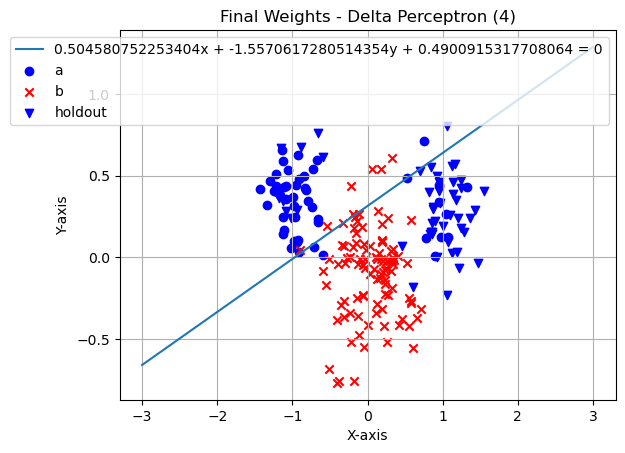

[ 0.49009153  0.50458075 -1.55706173]


In [927]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (4)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.scatter(X_holdout[1,:], X_holdout[2,:], c='b', label='holdout', marker='v')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [922]:
predictions = perceptron_classifier.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]))

In [923]:
accuracy_4 = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_4

0.22

In [924]:
print("Accuracy in section 1: {}".format(accuracy_1))
print("Accuracy A in section 1: {}".format(accuracy_classA_1))
print("Accuracy B in section 1: {}".format(accuracy_classB_1))

print("Accuracy in section 2: {}".format(accuracy_2))

print("Accuracy in section 3: {}".format(accuracy_3))

print("Accuracy in section 4: {}".format(accuracy_4))

Accuracy in section 1: 0.86
Accuracy A in section 1: 0.94
Accuracy B in section 1: 0.92
Accuracy in section 2: 0.72
Accuracy in section 3: 0.7
Accuracy in section 4: 0.22


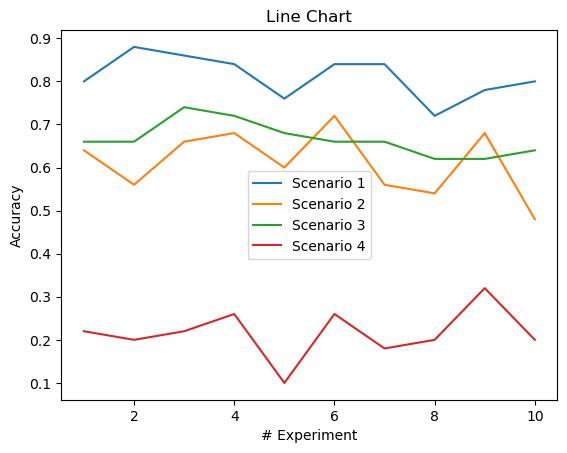

In [925]:
import matplotlib.pyplot as plt

# Data
x_values = range(1, 11)
data = [
    [0.8, 0.64, 0.66, 0.22],
    [0.88, 0.56, 0.66, 0.2],
    [0.86, 0.66, 0.74, 0.22],
    [0.84, 0.68, 0.72, 0.26],
    [0.76, 0.6, 0.68, 0.1],
    [0.84, 0.72, 0.66, 0.26],
    [0.84, 0.56, 0.66, 0.18],
    [0.72, 0.54, 0.62, 0.2],
    [0.78, 0.68, 0.62, 0.32],
    [0.8, 0.48, 0.64, 0.2]
]

# Labels for each line
labels = ['Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4']

# Create the line chart
for i in range(len(data[0])):
    y_values = [row[i] for row in data]
    plt.plot(x_values, y_values, label=labels[i])

# Add labels and legend
plt.xlabel('# Experiment')
plt.ylabel('Accuracy')
plt.title('Line Chart')
plt.legend()

# Show the plot
plt.show()
